In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
tempr_df = pd.read_csv('GlobalTemperatures.csv', parse_dates=[0])

In [3]:
## check the data
tempr_df.head()
tempr_df.count()
tempr_df.describe()
tempr_df.isnull().sum()
## dont drop records now as we need only LandAverageTemperature                         

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [4]:
## need the month to get mean to be able to replace null values. need year to decide if we need to drop rows
tempr_df['month'] = tempr_df['dt'].dt.month
tempr_df['year'] = tempr_df['dt'].dt.year
tempr_df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,month,year
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,2,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,3,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,4,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,5,1750
...,...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,8,2015
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,9,2015
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,10,2015
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,11,2015


In [12]:
#Find the mean by grouping by month to get the temperature so that we can replace NAN
#tempr_df.groupby("month").mean()
# Replace all NAN for each column
#tempr_df['LandAverageTemperature'] = tempr_df['LandAverageTemperature'].fillna(tempr_df.groupby('month')['LandAverageTemperature'].transform('mean'))
#df['AverageTemperatureUncertainty'] = df['AverageTemperatureUncertainty'].fillna(df.groupby('month')['AverageTemperatureUncertainty'].transform('mean'))

In [5]:
tempr_df.drop_duplicates(keep=False, inplace=True)
tempr_df.count()

dt                                           3192
LandAverageTemperature                       3180
LandAverageTemperatureUncertainty            3180
LandMaxTemperature                           1992
LandMaxTemperatureUncertainty                1992
LandMinTemperature                           1992
LandMinTemperatureUncertainty                1992
LandAndOceanAverageTemperature               1992
LandAndOceanAverageTemperatureUncertainty    1992
month                                        3192
year                                         3192
dtype: int64

In [6]:
## remove additional column
tempr_df = tempr_df.drop(columns=['LandAverageTemperatureUncertainty','LandMaxTemperature', 'LandMaxTemperatureUncertainty' ])
tempr_df = tempr_df.drop(columns=['LandMinTemperature', 'LandMinTemperatureUncertainty','LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty'])

In [7]:
tempr_df
tempr_df.isnull().sum()
tempr_df = tempr_df.dropna()
tempr_df.isnull().sum()

dt                        0
LandAverageTemperature    0
month                     0
year                      0
dtype: int64

In [8]:
tempr_df = tempr_df.drop(columns =['year', 'month'])

In [9]:
##index the dataframe
tempr_df
tempr_df_indx = tempr_df.set_index(['dt'])

<AxesSubplot:xlabel='dt'>

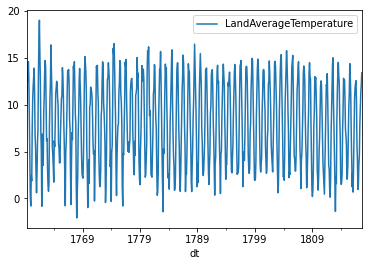

In [10]:
#check stationary by visuals
tempr_df_indx[100:800].plot()

            LandAverageTemperature
dt                                
1750-01-01                     NaN
1750-02-01                     NaN
1750-03-01                     NaN
1750-04-01                     NaN
1750-05-01                     NaN
...                            ...
2015-08-01                9.613139
2015-09-01                9.612000
2015-10-01                9.622361
2015-11-01                9.630056
2015-12-01                9.669389

[3180 rows x 1 columns]             LandAverageTemperature
dt                                
1750-01-01                     NaN
1750-02-01                     NaN
1750-03-01                     NaN
1750-04-01                     NaN
1750-05-01                     NaN
...                            ...
2015-08-01                4.203130
2015-09-01                4.202181
2015-10-01                4.204709
2015-11-01                4.200318
2015-12-01                4.153441

[3180 rows x 1 columns]


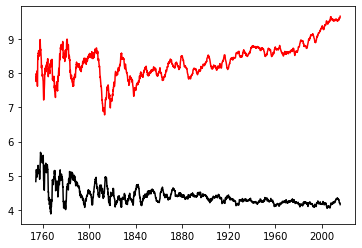

In [11]:
## check out rolling mean and standard deviation to get an idea of stationary data
rollmean = tempr_df_indx.rolling(window = 36).mean()
rollstd = tempr_df_indx.rolling(window = 36).std()
print(rollmean,rollstd)
meanplt = plt.plot(rollmean, color = 'red', label = 'Mean')
stdplt = plt.plot(rollstd, color ='black', label = 'STD')
plt.show()

In [12]:
##not stationary, so need to check ad fuller test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(tempr_df_indx['LandAverageTemperature'], autolag = 'AIC')
dft_out = pd.Series(dftest[0:4], index = ['teststat','pvalue','lags','observation'])
for key, value in dftest[4].items():
    dft_out['Critical value (%s)' %key] = value
print(dft_out)

## doubtful

teststat                  -3.991678
pvalue                     0.001455
lags                      28.000000
observation             3151.000000
Critical value (1%)       -3.432427
Critical value (5%)       -2.862458
Critical value (10%)      -2.567259
dtype: float64


c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


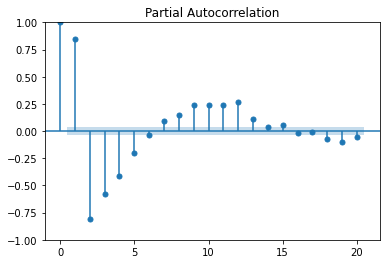

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
## pacf helps determining the values for AR(autoregression) because 
## pacf considers only the direct corelation of previous values. 
pacf = plot_pacf(tempr_df_indx['LandAverageTemperature'], lags = 20)
## since we see that upto 13 lag is good for future prediction so choose 13

In [14]:
X = tempr_df_indx.values
X.size

3180

In [23]:
#create test and train data 
X_train = X[:len(X)-500]
X_test = X[len(X)-500:]
X_test.size
X_train.size

2680

In [37]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(X_train, lags = 13).fit()

In [38]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 2680
Model:                    AutoReg(13)   Log Likelihood               -3521.402
Method:               Conditional MLE   S.D. of innovations              0.906
Date:                Tue, 14 Dec 2021   AIC                           7072.803
Time:                        08:40:55   BIC                           7161.134
Sample:                            13   HQIC                          7104.766
                                 2680                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3444      0.313      7.482      0.000       1.730       2.958
y.L1           0.4649      0.019     24.156      0.000       0.427       0.503
y.L2           0.0659      0.021      3.155      0.0

In [52]:
pred = model.predict(start = len(X)-500, end = len(X)-1, dynamic = False)
pred.size
pred

array([11.43818732, 13.74060865, 14.62247824, 13.87703306, 11.81199852,
        8.95003466,  5.90379409,  3.54643448,  2.45986652,  2.94266864,
        5.0027258 ,  8.0282894 , 11.12563348, 13.47561611, 14.45588881,
       13.80213963, 11.71905512,  8.78325091,  5.75645318,  3.43720837,
        2.4366794 ,  3.0107374 ,  5.02099293,  7.93732136, 10.96475932,
       13.28330758, 14.27125912, 13.66375797, 11.62934898,  8.72229687,
        5.7221263 ,  3.42767624,  2.44745734,  3.03638792,  5.03294912,
        7.90257442, 10.87550835, 13.15364479, 14.12691489, 13.53604093,
       11.54185578,  8.68215327,  5.72502335,  3.46154667,  2.49456469,
        3.07807893,  5.05087261,  7.8813799 , 10.81014492, 13.05284766,
       14.01037268, 13.42886313, 11.46698262,  8.65279097,  5.74145686,
        3.51221996,  2.55963478,  3.13492116,  5.07970298,  7.86964735,
       10.75576303, 12.96525494, 13.90828843, 13.33536145, 11.4032437 ,
        8.63208901,  5.7653885 ,  3.57040489,  2.6327112 ,  3.19

In [53]:
X_test

array([[11.198],
       [13.382],
       [14.288],
       [14.016],
       [11.744],
       [ 9.098],
       [ 5.915],
       [ 3.55 ],
       [ 3.059],
       [ 3.395],
       [ 5.706],
       [ 8.584],
       [11.742],
       [13.557],
       [14.351],
       [13.514],
       [12.152],
       [ 9.318],
       [ 5.893],
       [ 3.667],
       [ 2.884],
       [ 3.031],
       [ 4.517],
       [ 8.294],
       [10.942],
       [13.086],
       [14.155],
       [13.511],
       [11.895],
       [ 8.511],
       [ 5.66 ],
       [ 3.681],
       [ 2.492],
       [ 3.471],
       [ 5.702],
       [ 8.85 ],
       [11.78 ],
       [13.876],
       [14.631],
       [14.09 ],
       [11.862],
       [ 9.156],
       [ 6.544],
       [ 3.749],
       [ 2.705],
       [ 3.456],
       [ 5.607],
       [ 8.791],
       [11.414],
       [13.22 ],
       [14.364],
       [13.297],
       [12.03 ],
       [ 9.339],
       [ 6.35 ],
       [ 3.74 ],
       [ 2.679],
       [ 2.841],
       [ 5.474

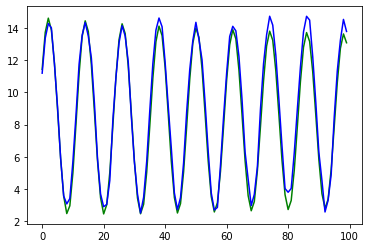

In [54]:
predplot = plt.plot(pred[:100], color = 'green')
testplot = plt.plot(X_test[:100], color = 'blue')
plt.show()

In [55]:
## calculate error
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(X_test, pred))
rmse

1.5012770133686872